<a href="https://colab.research.google.com/github/vitaldb/examples/blob/master/asa_mortality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Comparison of mortality rates depending on ASA physical status class
In this example, we will learn how to estimate and compare mortality rates depending on ASA physical status class with <code>VitalDB</code> dataset.<br>

> Note that <b>all users who use Vital DB, an open biosignal dataset, must agree to the Data Use Agreement below. </b> If you do not agree, please close this window. Click here: [Data Use Agreement](https://vitaldb.net/dataset/?query=overview&documentId=13qqajnNZzkN7NZ9aXnaQ-47NWy7kx-a6gbrcEsi-gak&sectionId=h.vcpgs1yemdb5)

## Preparation

In [1]:
import pandas as pd

# Load clinical information data
df_cases = pd.read_csv("https://api.vitaldb.net/cases")

# Print the average of death in hospital
print(df_cases.death_inhosp.mean() * 100)

df_cases

0.8922980588603632


,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
0,1,5955,0,11542,-552,10848.0,1668,10368,-236220,627780,...,0,120,0.0,100,70,0,10,0,0,0
1,2,2487,0,15741,-1039,14921.0,1721,14621,-221160,1506840,...,0,150,0.0,0,100,0,20,0,0,0
2,3,2861,0,4394,-590,4210.0,1090,3010,-218640,40560,...,0,0,0.0,0,50,0,0,0,0,0
3,4,1903,0,20990,-778,20222.0,2522,17822,-201120,576480,...,0,80,0.0,100,100,0,50,0,0,0
4,5,4416,0,21531,-1009,22391.0,2591,20291,-67560,3734040,...,0,0,0.0,0,160,0,10,900,0,2100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6383,6384,5583,0,15248,-260,15640.0,2140,14140,-215340,648660,...,0,150,0.0,0,90,0,20,0,0,0
6384,6385,2278,0,20643,-544,20996.0,2396,19496,-225600,1675200,...,0,100,0.0,0,100,0,25,30,0,300
6385,6386,4045,0,19451,-667,19133.0,3533,18233,-200460,836340,...,0,70,0.0,0,130,0,10,0,0,0
6386,6387,5230,0,12025,-550,12830.0,1730,11030,-227760,377040,...,0,120,0.0,0,50,0,0,0,0,0


## Data Visualization

[0.5451241671714113, 0.2991325157044571, 1.3671875, 18.181818181818183]
[0.0, 1.9662921348314606, 5.2356020942408374, 27.027027027027028]


<module 'matplotlib.pyplot' from 'C:\\Users\\admin\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

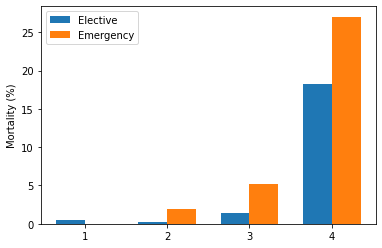

In [2]:
##########################################################
# column name'asa' stands for ASA class
# column name'emop' stands for emergency surgery
# column name 'death_inhosp' stands for death in hospital
##########################################################

# Estimate patients' mortality rate depending on ASA class in emergency surgery
el_y = [df_cases[(df_cases['asa'] == asa) & ~df_cases['emop']]['death_inhosp'].mean() * 100 for asa in range(1,5)]
print(el_y)

# Estimate patients' mortality rate depending on ASA class in general surgery
em_y = [df_cases[(df_cases['asa'] == asa) & df_cases['emop']]['death_inhosp'].mean() * 100 for asa in range(1,5)]
print(em_y)

# Draw a bar graph
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
w = 0.35
x = np.arange(1,5)
ax.bar(x - w/2, el_y, w, label='Elective')
ax.bar(x + w/2, em_y, w, label='Emergency')
ax.set_ylabel('Mortality (%)')
ax.set_xticks(x)
ax.legend()
plt